In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Seems the target variable is fairly OK , as the min is not 0 and has some relevent cost of the house.

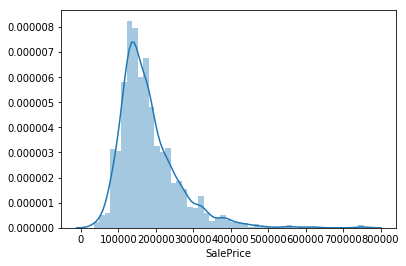

In [5]:
sns.distplot(data['SalePrice'])

## Observable positive skewness & peakedness!

In [6]:
#skewness & kurtosis
print('skewness: ', data.SalePrice.skew())
print('Kurtosis: ', data.SalePrice.kurt())

skewness:  1.8828757597682129
Kurtosis:  6.536281860064529


# Relationship between target variable with Numerical predictors:
    

In [7]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

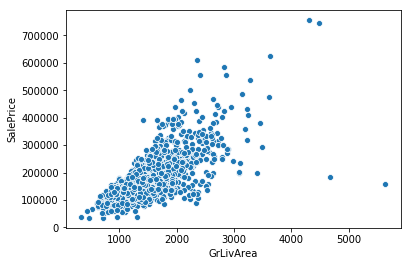

In [8]:
sns.scatterplot(x = 'GrLivArea' , y = 'SalePrice', data = data )
plt.show()

### It seems saleprice and GrLivArea shows Linear relationship.

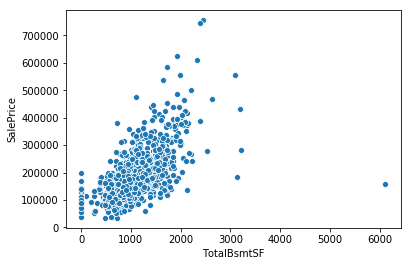

In [9]:
sns.scatterplot(x = 'TotalBsmtSF' , y = 'SalePrice', data = data )
plt.show()

### Sometimes TotalBsmtSF gives 0 value to SalePrice. but then it shows strong linear relationship.

# Relationship between target variable with categorical predictors:

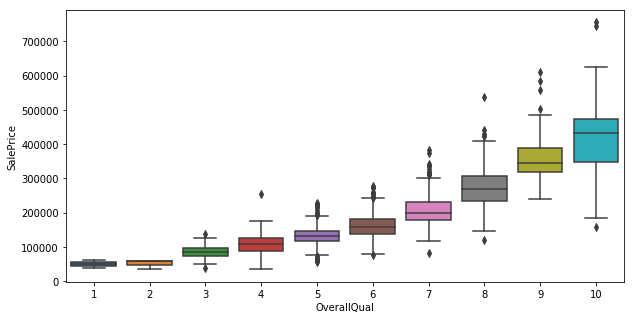

In [10]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'OverallQual', y = 'SalePrice' , data = data)
plt.show()

### OverallQual and SalePrice are strongly related to eachother. as the quality increases saleprice is also increasing.

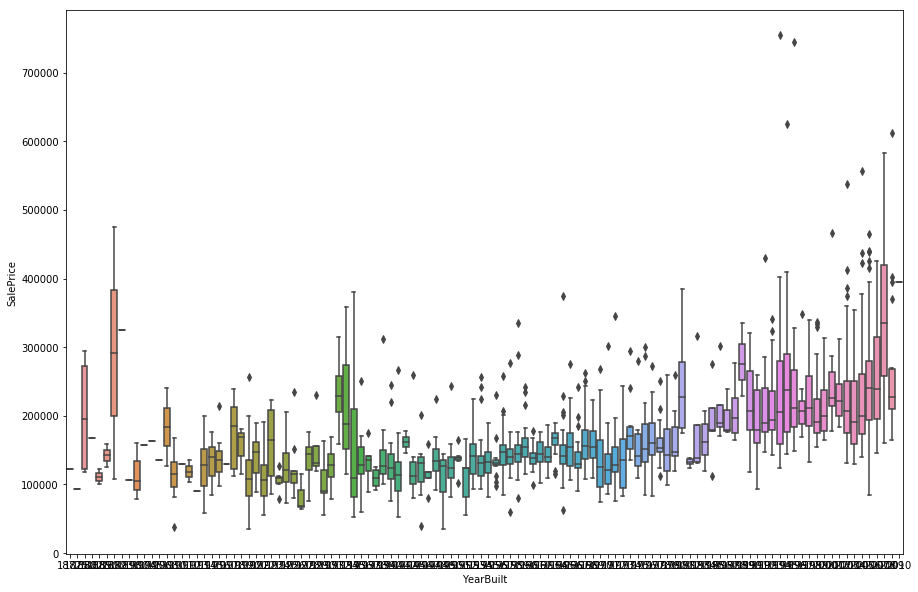

In [11]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'YearBuilt', y = 'SalePrice' , data = data)
plt.show()

## Seems the saleprice has been increased in the new timestamp compare to previous years.

## To analyse more features we will see some corelation between the features using heatmaps:

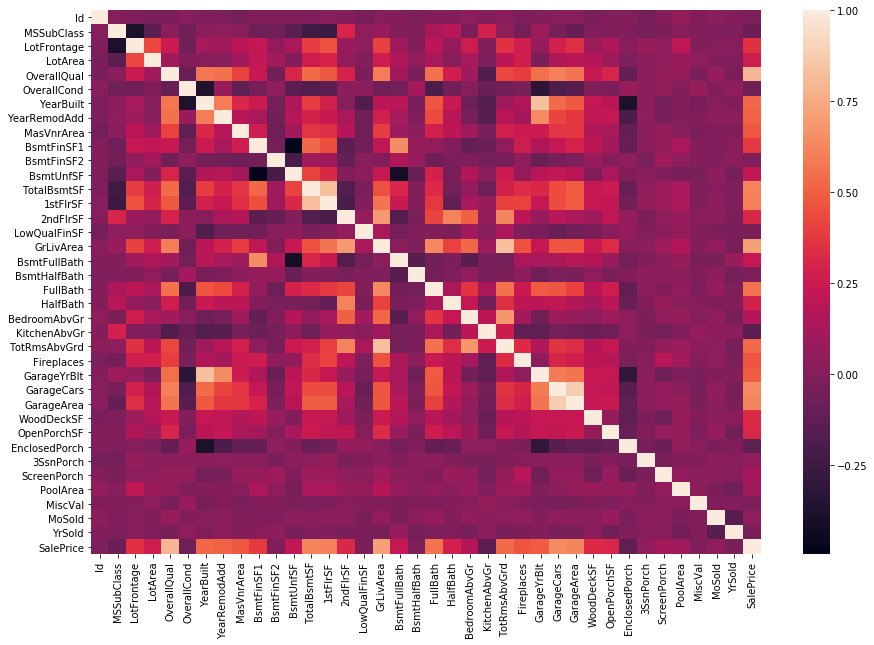

In [12]:
#Heatmap
plt.figure(figsize = (15,10))
sns.heatmap(data.corr())
plt.show()

In [13]:
sale_price_corr = data.corr()['SalePrice']

In [14]:
df = pd.DataFrame(sale_price_corr)

In [15]:
df[df.SalePrice > 0.5]

,SalePrice
OverallQual,0.790982
YearBuilt,0.522897
YearRemodAdd,0.507101
TotalBsmtSF,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
FullBath,0.560664
TotRmsAbvGrd,0.533723
GarageCars,0.640409
GarageArea,0.623431


1. OverallQual, GrLivArea, TotalBsmtSF are strongly corelated to eachother.

2. TotalBsmtSF & 1stFlrSF seems to tell us same thing so we will take only one feature to avoid multcolinearity.

3. GarageArea & GarageCars seems to tell us same thing so again we will take only one of them to avoid multicolinearity.

4. TotRmsAbvGrd & GrLivArea can cause multicolinearity therefore we will use only one of them.


In [16]:
features_selected = ['OverallQual','TotalBsmtSF','GrLivArea','FullBath','GarageCars','YearBuilt','SalePrice']

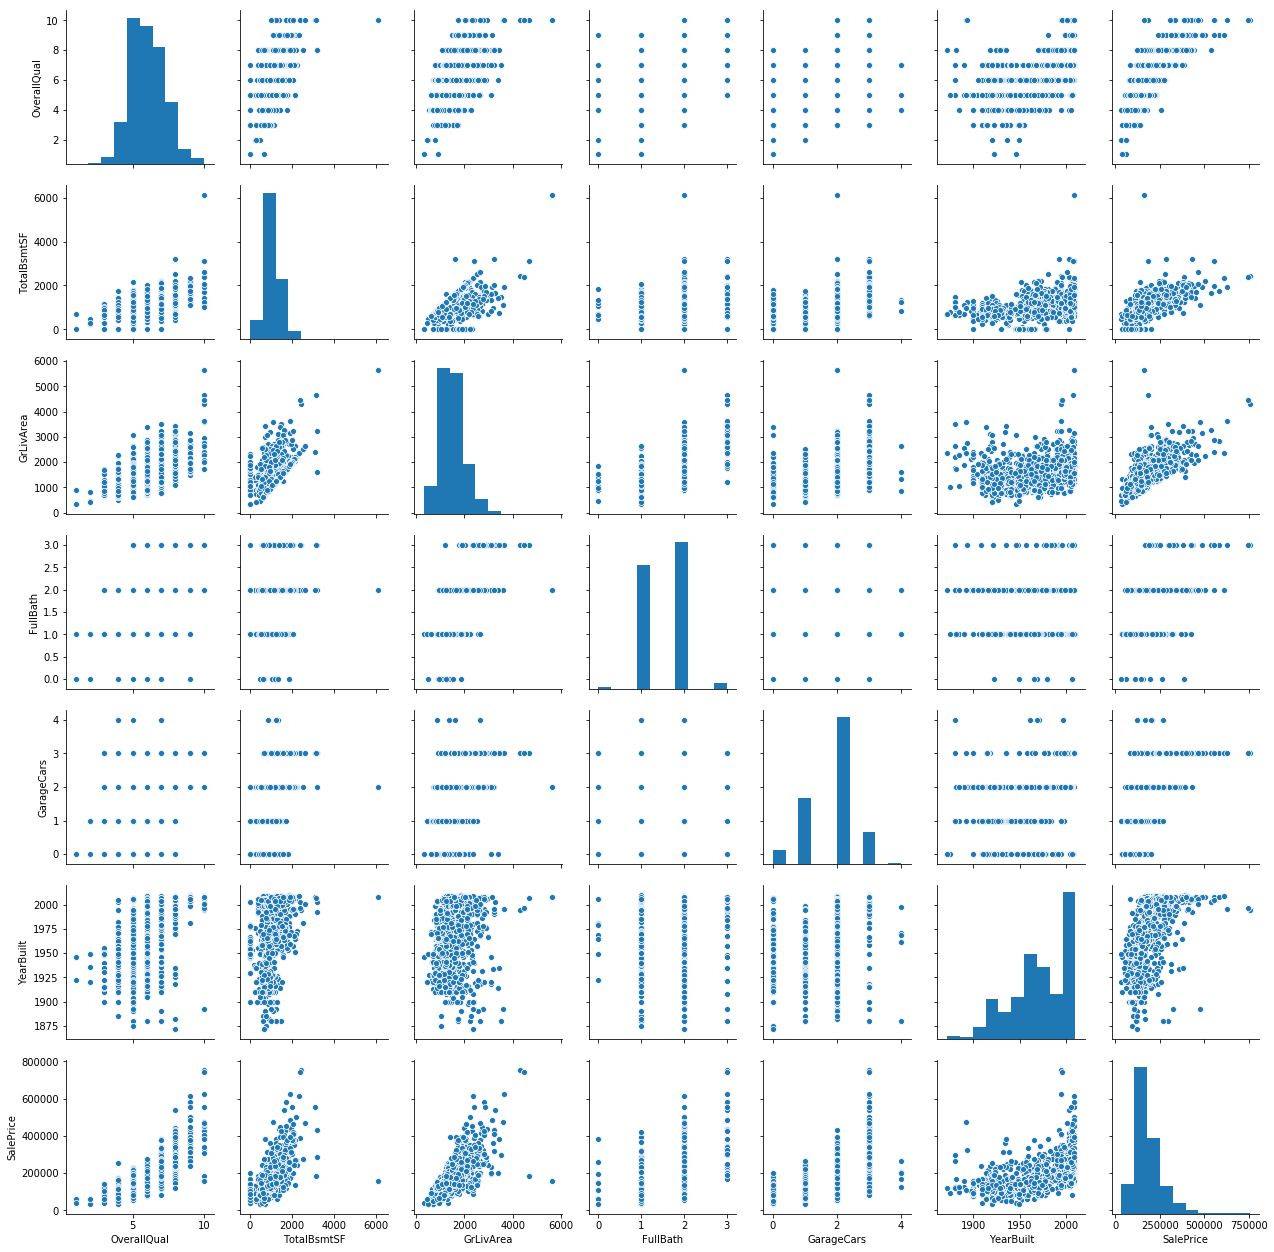

In [17]:
sns.pairplot(data[features_selected])
plt.show()

# Missing values:

In [18]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_value = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_value.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### we will delete all the features who has missing values more than 50% as well as we will not lose the valuable data.since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?).

### In what concerns the remaining cases, we can see that 'GarageX' variables have the same number of missing data. I bet missing data refers to the same set of observations . Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'GarageX' variables. The same logic applies to 'BsmtX' variables. Regarding 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'. Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable. In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [19]:
data = data.drop((missing_value[missing_value['Total'] > 1]).index,1)
data = data.drop(data.loc[data['Electrical'].isnull()].index)

In [20]:
data.isnull().sum().max()

0

## Checking the asumptions of linear regression:

# 1. Checking Normality:

## SalePrice:

### The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:


Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

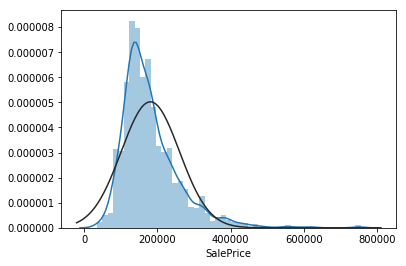

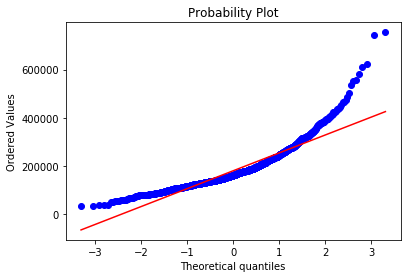

In [21]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(data['SalePrice'], fit = norm);
fig = plt.figure()
residual = stats.probplot(data['SalePrice'], plot=plt)

### We can see that saleprice got some peakness and positive skewness as well as doesn't follow the diaognal line. I think simple data transformation will solve the issue as well as we can use log transformation for positive skewed data.

In [22]:
#applying log transformation
data['SalePrice'] = np.log(data['SalePrice'])

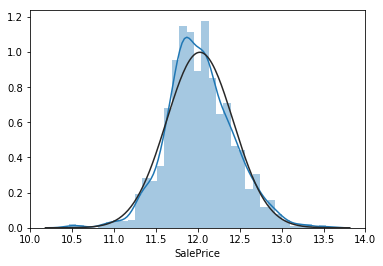

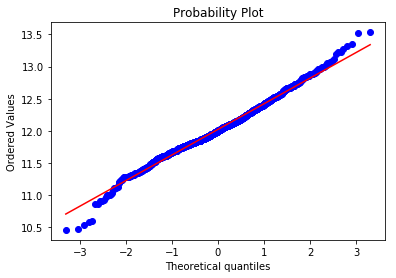

In [23]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(data['SalePrice'], fit = norm);
fig = plt.figure()
residual = stats.probplot(data['SalePrice'], plot=plt)

## GrLivArea:

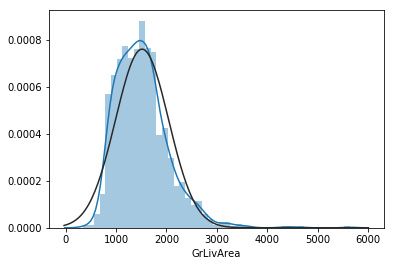

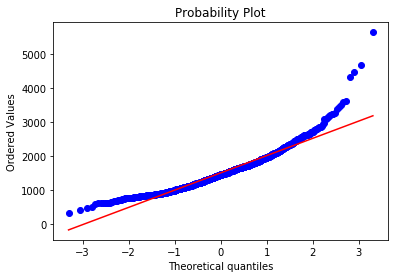

In [24]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(data['GrLivArea'], fit = norm);
fig = plt.figure()
residual = stats.probplot(data['GrLivArea'], plot=plt)

In [25]:
#applying log transformation
data['GrLivArea'] = np.log(data['GrLivArea'])

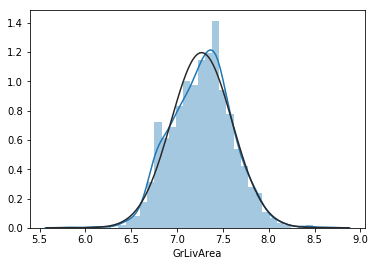

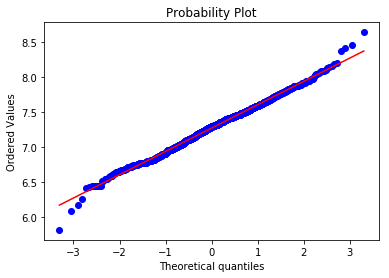

In [26]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(data['GrLivArea'], fit = norm);
fig = plt.figure()
residual = stats.probplot(data['GrLivArea'], plot=plt)

## TotalBsmtSF:

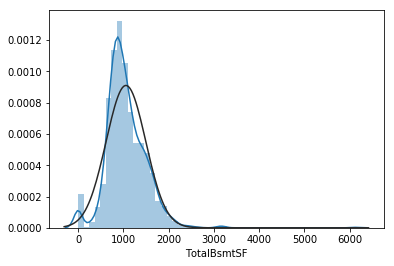

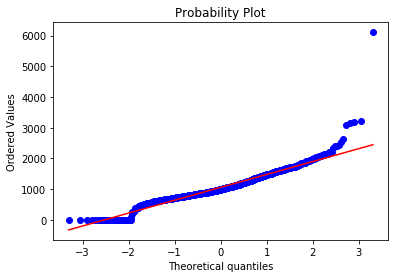

In [27]:
#histogram and normal probability plot
from scipy.stats import norm
from scipy import stats
sns.distplot(data['TotalBsmtSF'], fit = norm);
fig = plt.figure()
residual = stats.probplot(data['TotalBsmtSF'], plot=plt)

## We have a problem here to apply log transformation as there are some houses with no basement whose values is 0 so we can't use log transformation in those data. 

## To apply log transormations we can create new feature that can get a effect of having and not having basement.Then we can apply log transformation to the non-zero observations. 

# Feature Engineering:

In [28]:
#create new feature
#if area>0 it gets 1, for area==0 it gets 0
data['HasBsmt'] = pd.Series(len(data['TotalBsmtSF']), index=data.index)
data['HasBsmt'] = 0 
data.loc[data['TotalBsmtSF']>0,'HasBsmt'] = 1

In [29]:
#transform data
data.loc[data['HasBsmt']==1,'TotalBsmtSF'] = np.log(data['TotalBsmtSF'])

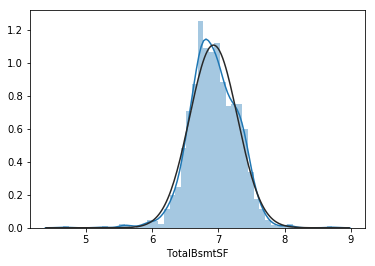

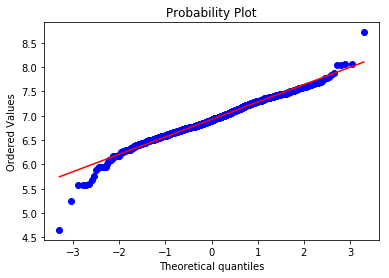

In [30]:
#histogram and normal probability plot
sns.distplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
residual = stats.probplot(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

# 2.Homoscedasticity:

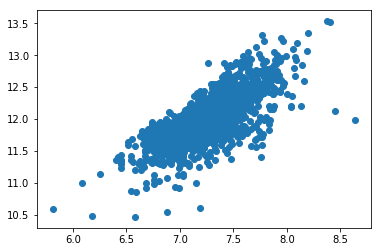

In [31]:
#scatter plot
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.show()

## previous scatter plot (previous to log transformations), had a conic shape. As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

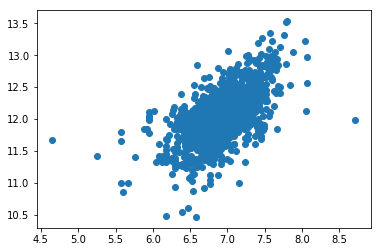

In [32]:
#scatter plot
plt.scatter(data[data['TotalBsmtSF']>0]['TotalBsmtSF'], data[data['TotalBsmtSF']>0]['SalePrice']);

# Categorical to Numercal using Dummy varables: 

In [39]:
data = pd.get_dummies(data)

# Modelling:

In [40]:
from sklearn.model_selection import train_test_split
X = data.drop(['SalePrice','HasBsmt'],axis = 1)
y= data.SalePrice

In [41]:
import statsmodels.api as sm
X = sm.add_constant(X)  #Add an intercept to our model

model  =  sm.OLS(y, X).fit()  # OLS(output,input)
predictions  = model.predict(X)

# Print the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     107.4
Date:                Fri, 10 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:06:18   Log-Likelihood:                 1347.4
No. Observations:                1459   AIC:                            -2309.
Df Residuals:                    1266   BIC:                            -1289.
Df Model:                         192                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.0786      0.658      1.638      0.102      -0.213       2.370
Id                    -4.623e-06   6.91e-06     -0.669      0.504   -1.82e-05    8.94e-06
MSSubClass               -0.0003      0.000     -0.873      0.383      -0.001       0.000
LotArea                2.823e-06   4.66e-07      6.063      0.000    1.91e-06    3.74e-06
OverallQual               0.0425      0.004      9.582      0.000       0.034       0.051
OverallCond               0.0396      0.004     10.497      0.000       0.032       0.047
YearBuilt                 0.0019      0.000      5.901      0.000       0.001       0.003
YearRemodAdd              0.0007      0.000      2.916      0.004       0.000       0.001
BsmtFinSF1                0.0002   2.48e-05      6.383      0.000       0.000       0.000
BsmtFinSF2                0.0001   2.92e-05      4.007      0.000    5.98e-05       0.000
BsmtUnfSF              7.996e-05   2.41e-05      3.316      0.001    3.27e-05       0.000
TotalBsmtSF              -0.0021      0.007     -0.316      0.752      -0.015       0.011
1stFlrSF               1.293e-06   4.04e-05      0.032      0.974    -7.8e-05    8.06e-05
2ndFlrSF               5.418e-05   3.03e-05      1.786      0.074   -5.33e-06       0.000
LowQualFinSF          -6.142e-06   8.37e-05     -0.073      0.942      -0.000       0.000
GrLivArea                 0.4010      0.051      7.892      0.000       0.301       0.501
BsmtFullBath              0.0273      0.008      3.214      0.001       0.011       0.044
BsmtHalfBath              0.0051      0.013      0.381      0.703      -0.021       0.031
FullBath                  0.0137      0.010      1.414      0.158      -0.005       0.033
HalfBath                  0.0116      0.009      1.256      0.209      -0.007       0.030
BedroomAbvGr             -0.0054      0.006     -0.895      0.371      -0.017       0.006
KitchenAbvGr             -0.0609      0.025     -2.447      0.015      -0.110      -0.012
TotRmsAbvGrd              0.0046      0.004      1.096      0.273      -0.004       0.013
Fireplaces                0.0209      0.006      3.527      0.000       0.009       0.032
GarageCars                0.0269      0.010      2.817      0.005       0.008       0.046
GarageArea                0.0001   3.29e-05      3.156      0.002    3.93e-05       0.000
WoodDeckSF             9.734e-05   2.56e-05      3.803      0.000    4.71e-05       0.000
OpenPorchSF            6.357e-05   5.11e-05      1.245      0.213   -3.66e-05       0.000
EnclosedPorch          9.429e-05   5.54e-05      1.702      0.089   -1.44e-05       0.000
3SsnPorch                 0.0001   9.97e-05      1.192      0.233   -7.67e-05       0.000
ScreenPorch               0.0003   5.42e-05      4.786      0.000       0.000       0.000
PoolArea               